# 뉴럴네트워크 선형회귀(자동차 연비 데이터셋)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

#데이터준비

In [3]:
! wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/auto-mpg.csv

--2025-01-02 05:46:12--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18131 (18K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]  17.71K  --.-KB/s    in 0s      

2025-01-02 05:46:12 (96.2 MB/s) - ‘auto-mpg.csv’ saved [18131/18131]



In [20]:
df = pd.read_csv('/content/auto-mpg.csv')
df.shape

(398, 9)

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


##2.정보 확인

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [23]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [25]:
df.loc[df['horsepower']=='?','horsepower'] = np.nan

In [26]:
df['horsepower'] = df['horsepower'].astype('float')

In [27]:
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [28]:
df = df.dropna()
df.shape

(392, 9)

##3.데이터 분리

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [35]:
X = df.drop(['mpg','car name', 'model year'], axis = 1)

In [36]:
y = df['mpg']
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4.데이터 전처리

In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# fit은 그냥 학습시키는거, transform은 실제로 변환하는거
ss.fit(X_train)
X_train_s = ss.transform(X_train)

In [39]:
X_train_s

array([[ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
        -0.68982474],
       [-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
        -0.68982474],
       [ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
        -0.68982474],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, -0.1561399 ,  0.73076722,
        -0.68982474],
       [-0.87318372, -0.94128319, -1.0358895 , -0.72175802,  1.83265289,
        -0.68982474],
       [ 1.48290683,  1.97375578,  1.18793363,  2.39450014, -0.54884195,
        -0.68982474]])

In [40]:
y_train_n = y_train.to_numpy()
y_train_n

array([18.6, 25. , 18. , 15. , 39. , 15.5, 29.8, 25. , 21.5, 17. , 16. ,
       22.3, 30.7, 30. , 31. , 19.2, 16.5, 18. , 13. , 27.5, 18. , 11. ,
       17. , 14. , 26. , 34.2, 34.4, 35.1, 20. , 22. , 18.2, 32. , 31.9,
       21. , 22. , 37.2, 32.9, 19.4, 15. , 22. , 21. , 37. , 21. , 15. ,
       31. , 23. , 24.5, 29. , 30.5, 15. , 34.7, 27. , 28. , 19. , 41.5,
       17.5, 29. , 26. , 31.8, 18. , 16.5, 13. , 19. , 30. , 20. , 19. ,
       27. , 23. , 14. , 20.6, 27.9, 15. , 32. , 12. , 23. , 33.5, 25.5,
       40.8, 16.5, 32.3, 44.3, 12. , 32.8, 24. , 18.1, 14. , 13. , 11. ,
       18. , 32. , 27.2, 16. , 17.5, 12. , 26. , 14. , 28. , 20. , 13. ,
       27.2, 29. , 19.1, 28. , 27. , 19. , 26. , 15.5, 13. , 38. , 18. ,
       23.7, 24.5, 34. , 23. , 26. , 33. , 29.5, 15. , 24. , 32. , 14. ,
       14. , 39.1, 17.5, 17. , 21. , 33. , 25.8, 20.3, 24. , 20.2, 23.9,
       34. , 20.2, 28.1, 13. , 39.4, 14. , 16. , 18.5, 20. , 32. , 18. ,
       26.5, 16. , 16. , 29. , 10. , 15. , 46.6, 20

##5.모델 만들기

In [57]:
X_train_s.shape

(313, 6)

In [58]:
X_train_s[:3]

array([[ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
        -0.68982474],
       [-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
        -0.68982474],
       [ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
        -0.68982474]])

In [59]:
from keras import layers

model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=2, activation='relu'),
    layers.Dense(units=1)
    # 회귀기 때문에 마지막에서 액티베이션 없음
    # 회귀는 출력에 활성화 함수를 사용하지 않는다
])

# 파라미터는 가중치 + 편향
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
# 컴파일: 손실함수, 옵티마이저, 매트릭스 정하기

model.compile(
    loss='mse',
    optimizer='adam',
    # 학습이 잘 되는지 뭘 보면서 판단할거냐
    metrics=['mse'],
)

In [61]:
X_train_s.shape

(313, 6)

In [62]:
# 학습

# 313개를 전부 학습해야 1 epoch이고 10번 학습해야 1 epoch이 되는 셈
epochs = 300
batchsize = 32

# 변수로 받아야 학습 로그를 저장하고 이를 시각화 가능함
history = model.fit(X_train_s, y_train_n,
          epochs=epochs,
          batch_size=batchsize,
          # 검증용 데이터(데이터 중에 얼마정도는 검증용으로 쓰겠다)
          validation_split=0.2)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 584.1346 - mse: 584.1346 - val_loss: 684.9894 - val_mse: 684.9894
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 605.0645 - mse: 605.0645 - val_loss: 684.1146 - val_mse: 684.1146
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 579.0627 - mse: 579.0627 - val_loss: 683.0798 - val_mse: 683.0798
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 614.7697 - mse: 614.7697 - val_loss: 681.8538 - val_mse: 681.8538
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 609.9654 - mse: 609.9654 - val_loss: 680.3179 - val_mse: 680.3179
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 613.5735 - mse: 613.5735 - val_loss: 678.1576 - val_mse: 678.1576
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 591.1901 - mse: 591.1901 - val_loss: 675.3611 - val_mse: 675.3611
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 581.5497 - mse: 581.5497 - val_loss: 672.1304 - val_mse: 672.1304
Epoch 9/300
8/8

##학습 곡선

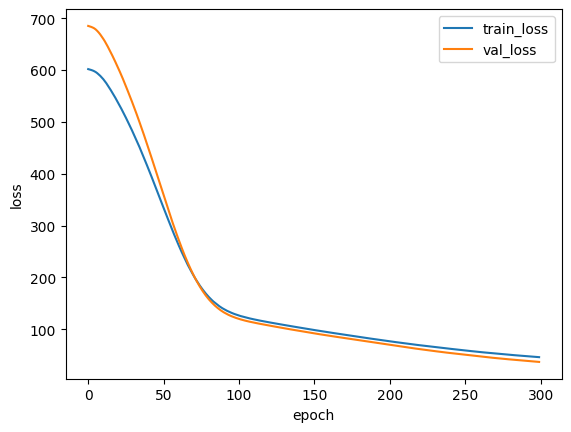

In [66]:
hist = history.history
epochs = history.epoch

plt.plot(epochs, hist['loss'], label='train_loss')
plt.plot(epochs, hist['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

##7.테스트

In [68]:
X_test_s = ss.transform(X_test)
y_test_n = y_test.to_numpy()

In [71]:
y_pred = model.predict(X_test_s)
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[32.990055 ],
       [21.65284  ],
       [34.530483 ],
       [35.322002 ],
       [27.06048  ],
       [30.55427  ],
       [ 5.3763213],
       [30.45365  ],
       [14.458819 ],
       [38.966286 ]], dtype=float32)

In [70]:
y_test_n[:10]

array([26. , 21.6, 36.1, 26. , 27. , 28. , 13. , 26. , 19. , 29. ])

In [73]:
y_pred.flatten()

array([32.990055 , 21.65284  , 34.530483 , 35.322002 , 27.06048  ,
       30.55427  ,  5.3763213, 30.45365  , 14.458819 , 38.966286 ,
        5.3763213, 15.450825 ,  5.3763213, 30.453922 ,  9.034062 ,
       29.106123 , 16.283396 , 29.497723 , 29.286291 , 27.134321 ,
       16.97003  , 36.94312  , 32.5215   ,  5.3763213, 34.499508 ,
       28.677532 , 26.519316 , 12.11825  , 38.069923 , 29.617338 ,
        5.3763213, 15.817042 ,  6.3233523, 28.438091 ,  5.3763213,
       32.691547 ,  6.2472615, 32.299706 ,  6.253803 ,  5.3763213,
        5.3763213, 32.146965 , 31.97928  , 30.582644 ,  5.3763213,
        5.3763213, 12.227899 , 32.976555 , 31.1886   , 33.369846 ,
        5.3763213, 25.823208 , 27.945465 , 26.944292 , 12.296947 ,
       15.085904 ,  5.3763213, 14.319461 , 27.448534 , 25.780642 ,
        5.3763213, 16.464132 , 14.721463 , 26.087805 , 24.027027 ,
       29.72021  , 26.897984 , 33.34395  ,  8.51513  ,  5.3763213,
       31.10261  ,  5.3763213, 18.606083 , 31.74983  , 15.6715

##평가지표

In [77]:
from sklearn.metrics import mean_squared_error

# y_pred는 이차형태라 y_test_n과 비교하려면 일차로 펴야함
msg = mean_squared_error(y_test_n, y_pred)
np.sqrt(msg)

7.0294161376933095